# Graphs for Diverse Led Funds

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'


In [2]:
df = pd.read_csv(
    "../00_source_data/Corporate Investments in Diverse Led Funds - Top 100 VC.csv",
    header=7,
    index_col=0,
)
df.reset_index(inplace=True, drop=True)


In [3]:
df.sample(5)

,VC Firm,Claim to support Diversity?,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,"Rank (1, highest DIP)",Website,Contact Information,Countries,Cities,Industries,Stages,Founded Year,Name of Founders,# of Investments,# of Exits,Min Check Size,Max Check Size,Funds Raised
48,Tencent,Does not specify,NaN,757.0,0.00%,86,https://www.tenx.tc/,exploreinvestments@tencent.com,China,Shenzhen,"Climate & Sustainability, Healthcare, Automati...",NaN,1998,Huateng Ma,659,NaN,NaN,NaN,"$12,600,000,000"
68,Spark Capital,They invested in many companies and even giant...,83.0,526.0,15.78%,23,https://sparkcapital.com,contactus@sparkcapital.com,USA,"San Francisco, New York, Boston","Consumer, Crypto & Blockchain, Enterprise, Har...","Seed, Pre-Seed, Series A",2005,"Bijan Sabet, Paul Conway, Santo Politi, Todd D...",507,91.0,"$500,000","$25,000,000","$3,800,000,000"
11,Kleiner Perkins,Has a mentorship and talent development fellow...,160.0,1374.0,11.64%,46,https://kleinerperkins.com,plans@kpcb.com,"USA, China","Shanghai, San Francisco","Consumer, Fintech, Enterprise, Deep Tech & Har...","Seed, Pre-Seed, Early Stage, Late Stage, Series A",1972,"Brook Byers, Eugene Kleiner, Frank Caufield, T...",1354,318.0,"$500,000","$15,000,000","$9,200,000,000"
63,SFC Capital,Does not specify,2.0,500.0,0.40%,82,https://sfccapital.com,info@sfccapital.com,United Kingdom,London,"Food & Beverage, Life Sciences, Media, Enterta...","Early Stage, Pre-Seed",2012,Stephen Page,535,72.0,"£100,000","£300,000","£14,100,000"
52,Charles River Ventures,Yes - website doesnt really specify initiative...,106.0,659.0,16.08%,21,https://www.crv.com/,careers@crv.com,USA,"San Francisco, Palo Alto, Boston","Biotech, Consumer, Enterprise, Creator Economy...","Early Stage, Series A, Seed",1970,"Dave Salvant, Rick Burnes, Songe Laron",626,153.0,"$10,000,000","$20,000,000","$2,600,000,000"


In [4]:
# change DIP: Diversity Investment Percentage to float
df["DIP: Diversity Investment Percentage"] = (
    df["DIP: Diversity Investment Percentage"]
    .str.replace("%", "")
    .astype(float)
)


### Create Graphs

#### Graph 1: Total investment count for top 100 VC firms

In [5]:
df_sorted = df.sort_values(by="Total Investment Count", ascending=False)
# drop nan
df_sorted.dropna(inplace=True)


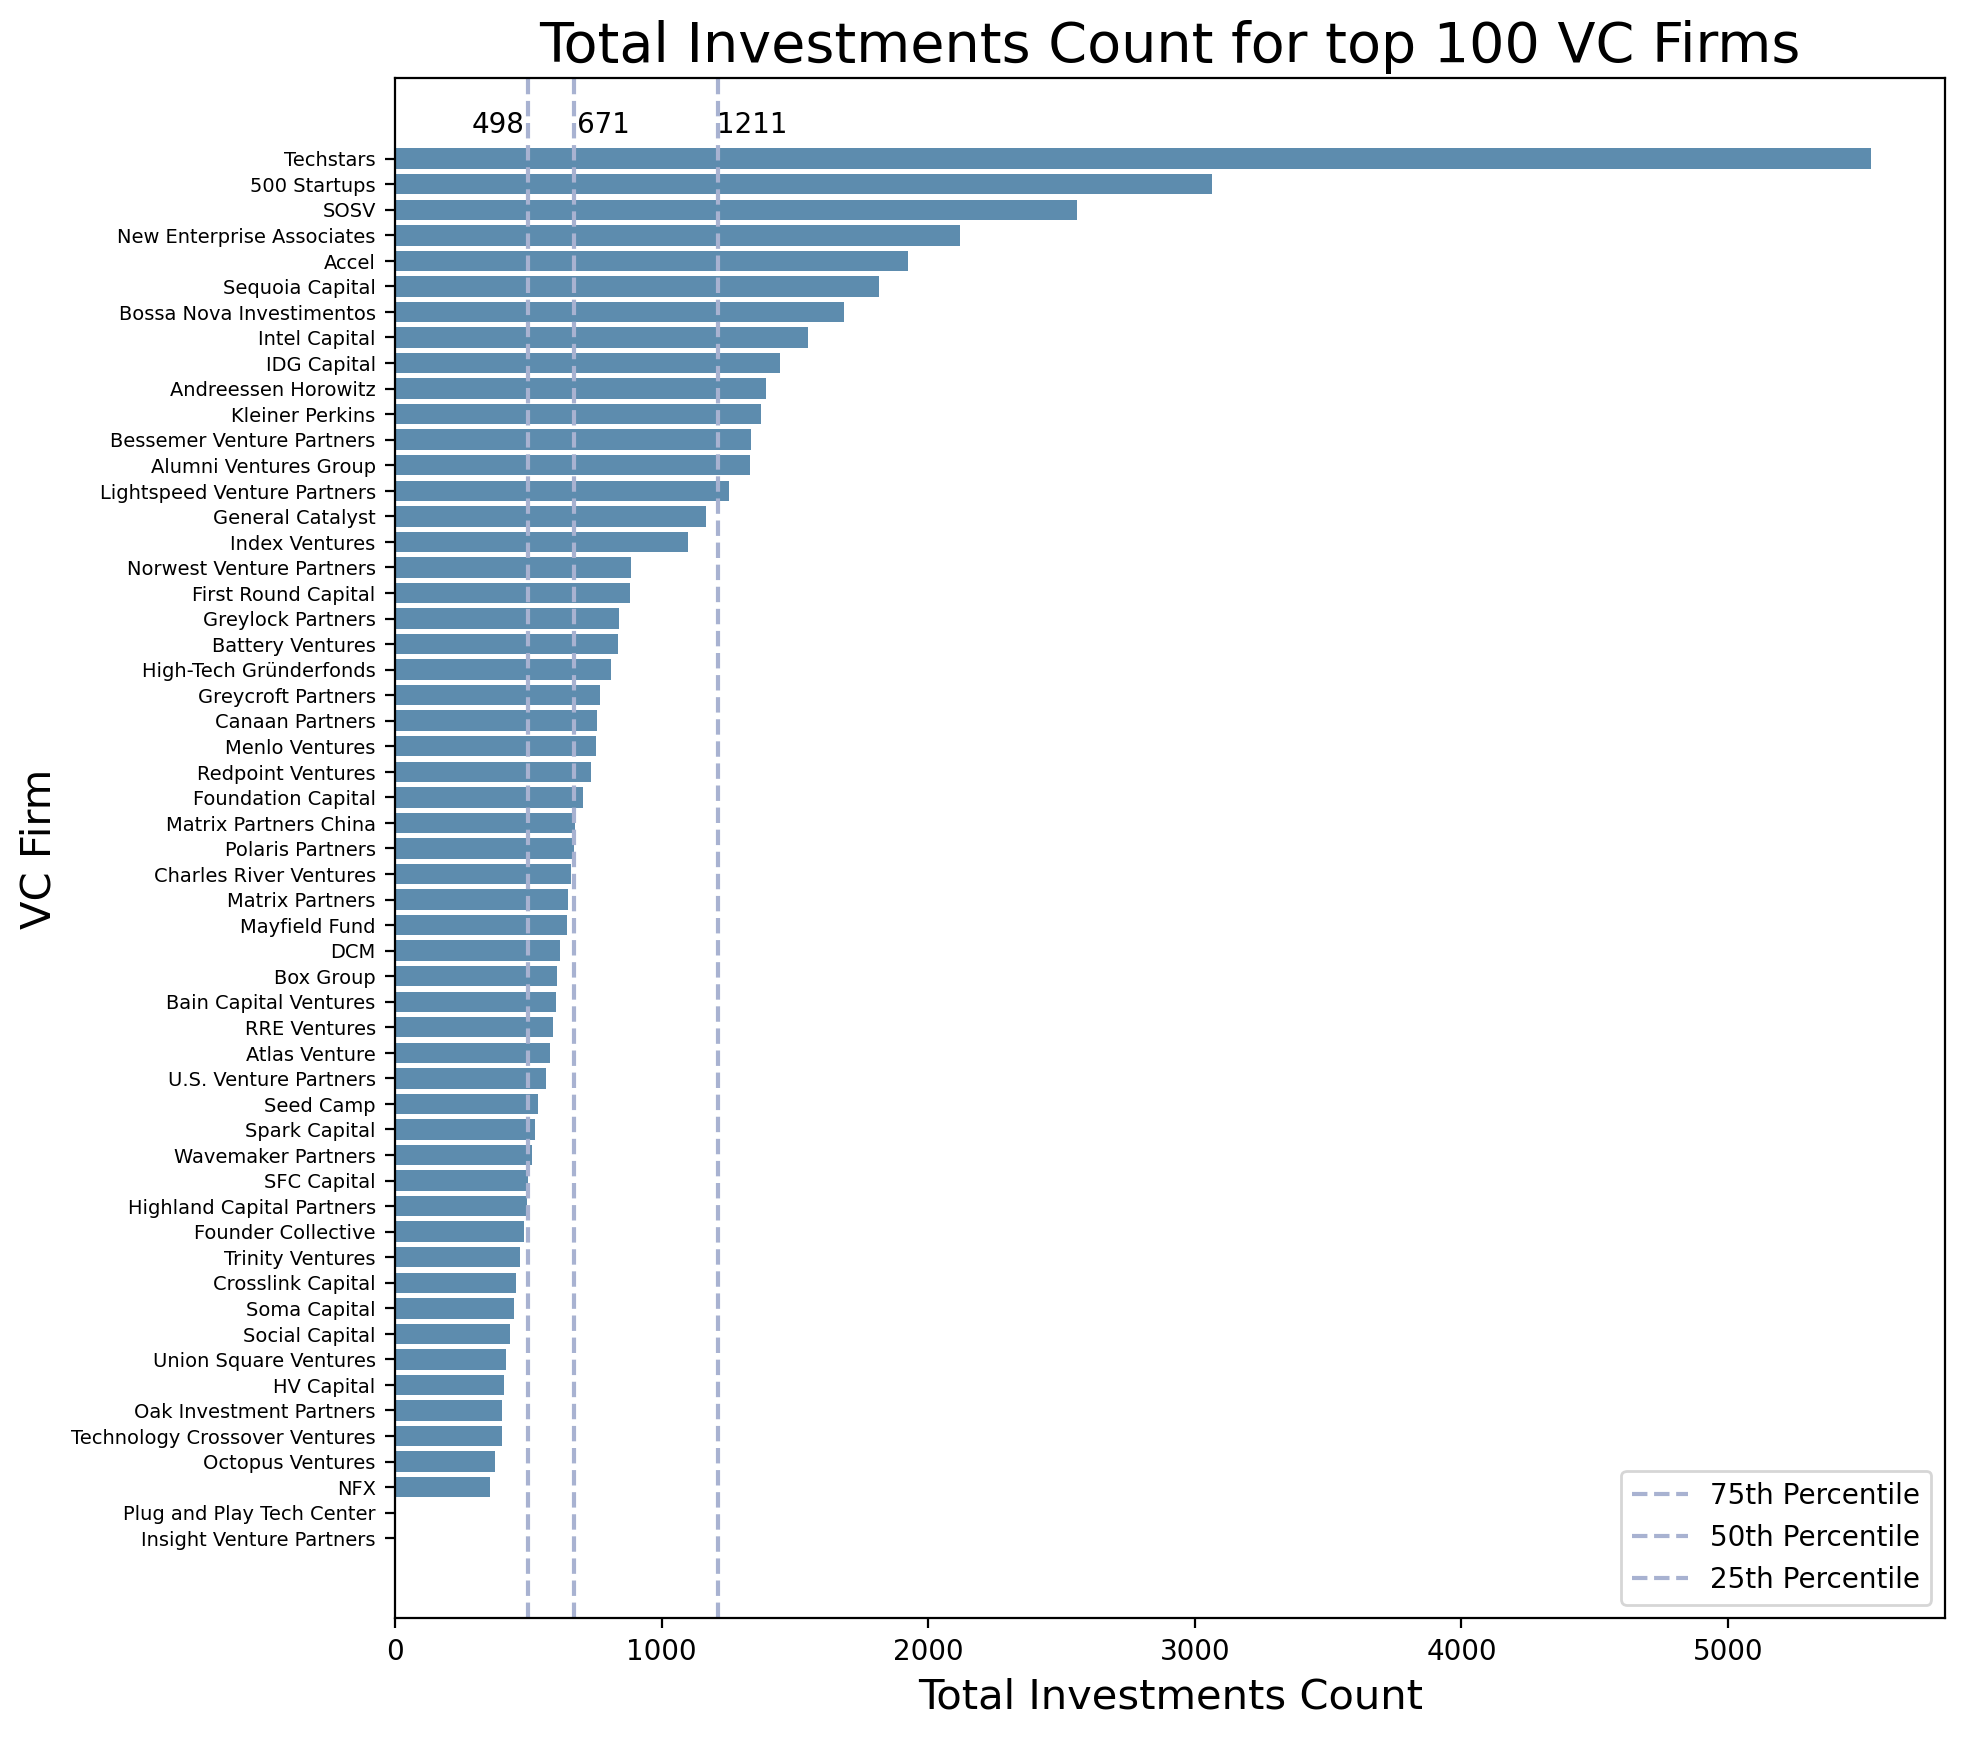

In [6]:
# create a bar chart of total investments count
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(
    df_sorted["VC Firm"], df_sorted["Total Investment Count"], color="#5D8CAE"
)
ax.set_title("Total Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Total Investments Count", fontsize=15)
ax.tick_params(axis="y", labelsize=7)
pv_75 = np.percentile(df_sorted["Total Investment Count"], 75)
pv_50 = np.percentile(df_sorted["Total Investment Count"], 50)
pv_25 = np.percentile(df_sorted["Total Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 130, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()

In [7]:
df_sorted["Total Investment Count"].describe()

count      55.000000
mean      958.036364
std       865.099180
min         2.000000
25%       497.000000
50%       670.000000
75%      1210.000000
max      5538.000000
Name: Total Investment Count, dtype: float64

In [9]:
df_sorted[df_sorted["VC Firm"]=="Plug and Play Tech Center"]

,VC Firm,Claim to support Diversity?,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,"Rank (1, highest DIP)",Website,Contact Information,Countries,Cities,Industries,Stages,Founded Year,Name of Founders,# of Investments,# of Exits,Min Check Size,Max Check Size,Funds Raised
9,Plug and Play Tech Center,Designed a diversity initiative to better prov...,0.0,3.0,0.0,86,https://plugandplaytechcenter.com,investment@plugandplaytechcenter.com,"USA, Canada, Brazil, United Arab Emirates, Net...","Chicago, Cleveland, Detroit, São Paulo, Topeka...","DTC, Enterprise, Fintech, Food & Beverage, Hea...","Early Stage, Series A, Series B, Series C",2006,"Ali Safavi, Jackie Hernandez, Saeed Amidi",1447,140.0,"$50,000","$250,000","$45,500,000"


In [24]:
# save the figure
fig.savefig(
    "../30_results/Total Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)


#### Graph 2: Diversity investment count for top 100 VC firms

In [25]:
# sort by Diversity Investment Count
df_sorted_di = df.sort_values(by="Diversity Investment Count", ascending=False)
# drop nan
df_sorted_di.dropna(inplace=True)


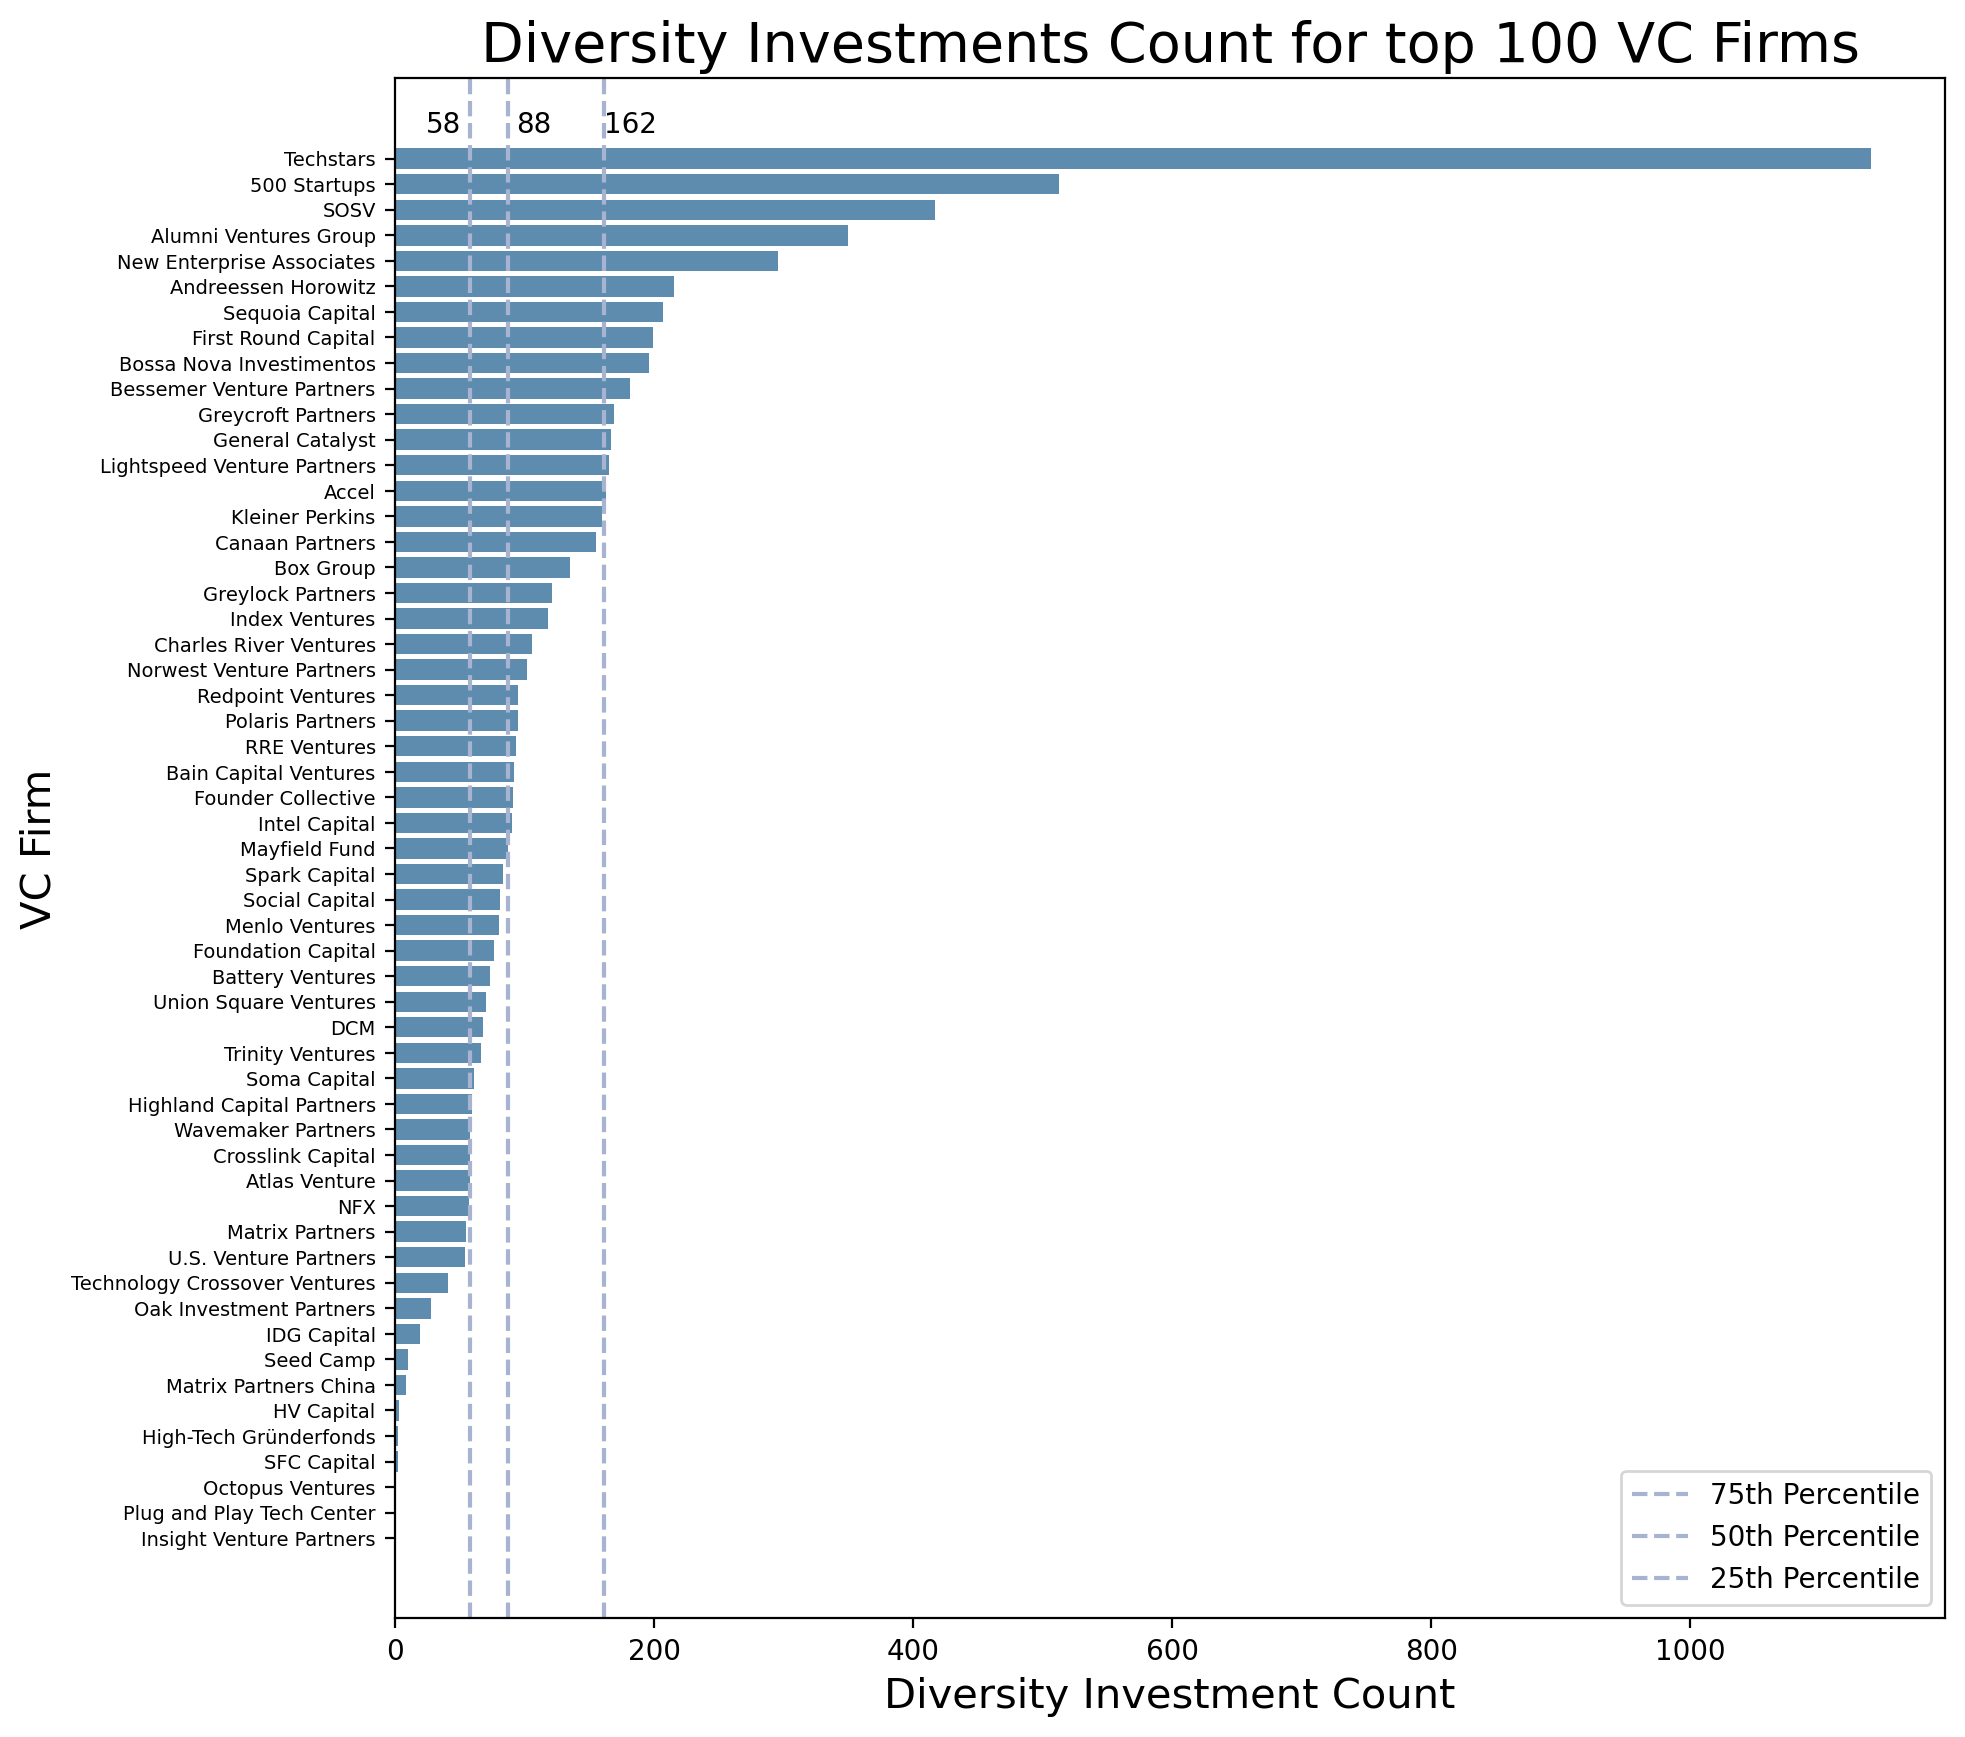

In [26]:
# create a bar chart of diversity investments count
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(
    df_sorted_di["VC Firm"],
    df_sorted_di["Diversity Investment Count"],
    color="#5D8CAE",
)
ax.set_title("Diversity Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Count", fontsize=15)
ax.tick_params(axis="y", labelsize=7)
pv_75 = np.percentile(df_sorted_di["Diversity Investment Count"], 75)
pv_50 = np.percentile(df_sorted_di["Diversity Investment Count"], 50)
pv_25 = np.percentile(df_sorted_di["Diversity Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()


In [27]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)


#### Graph 3: Diversity investment percentage for top 100 VC firms

In [28]:
# sort by DIP: Diversity Investment Percentage
df_sorted_dip = df.sort_values(
    by="DIP: Diversity Investment Percentage", ascending=False
)
# drop nan
df_sorted_dip.dropna(inplace=True)


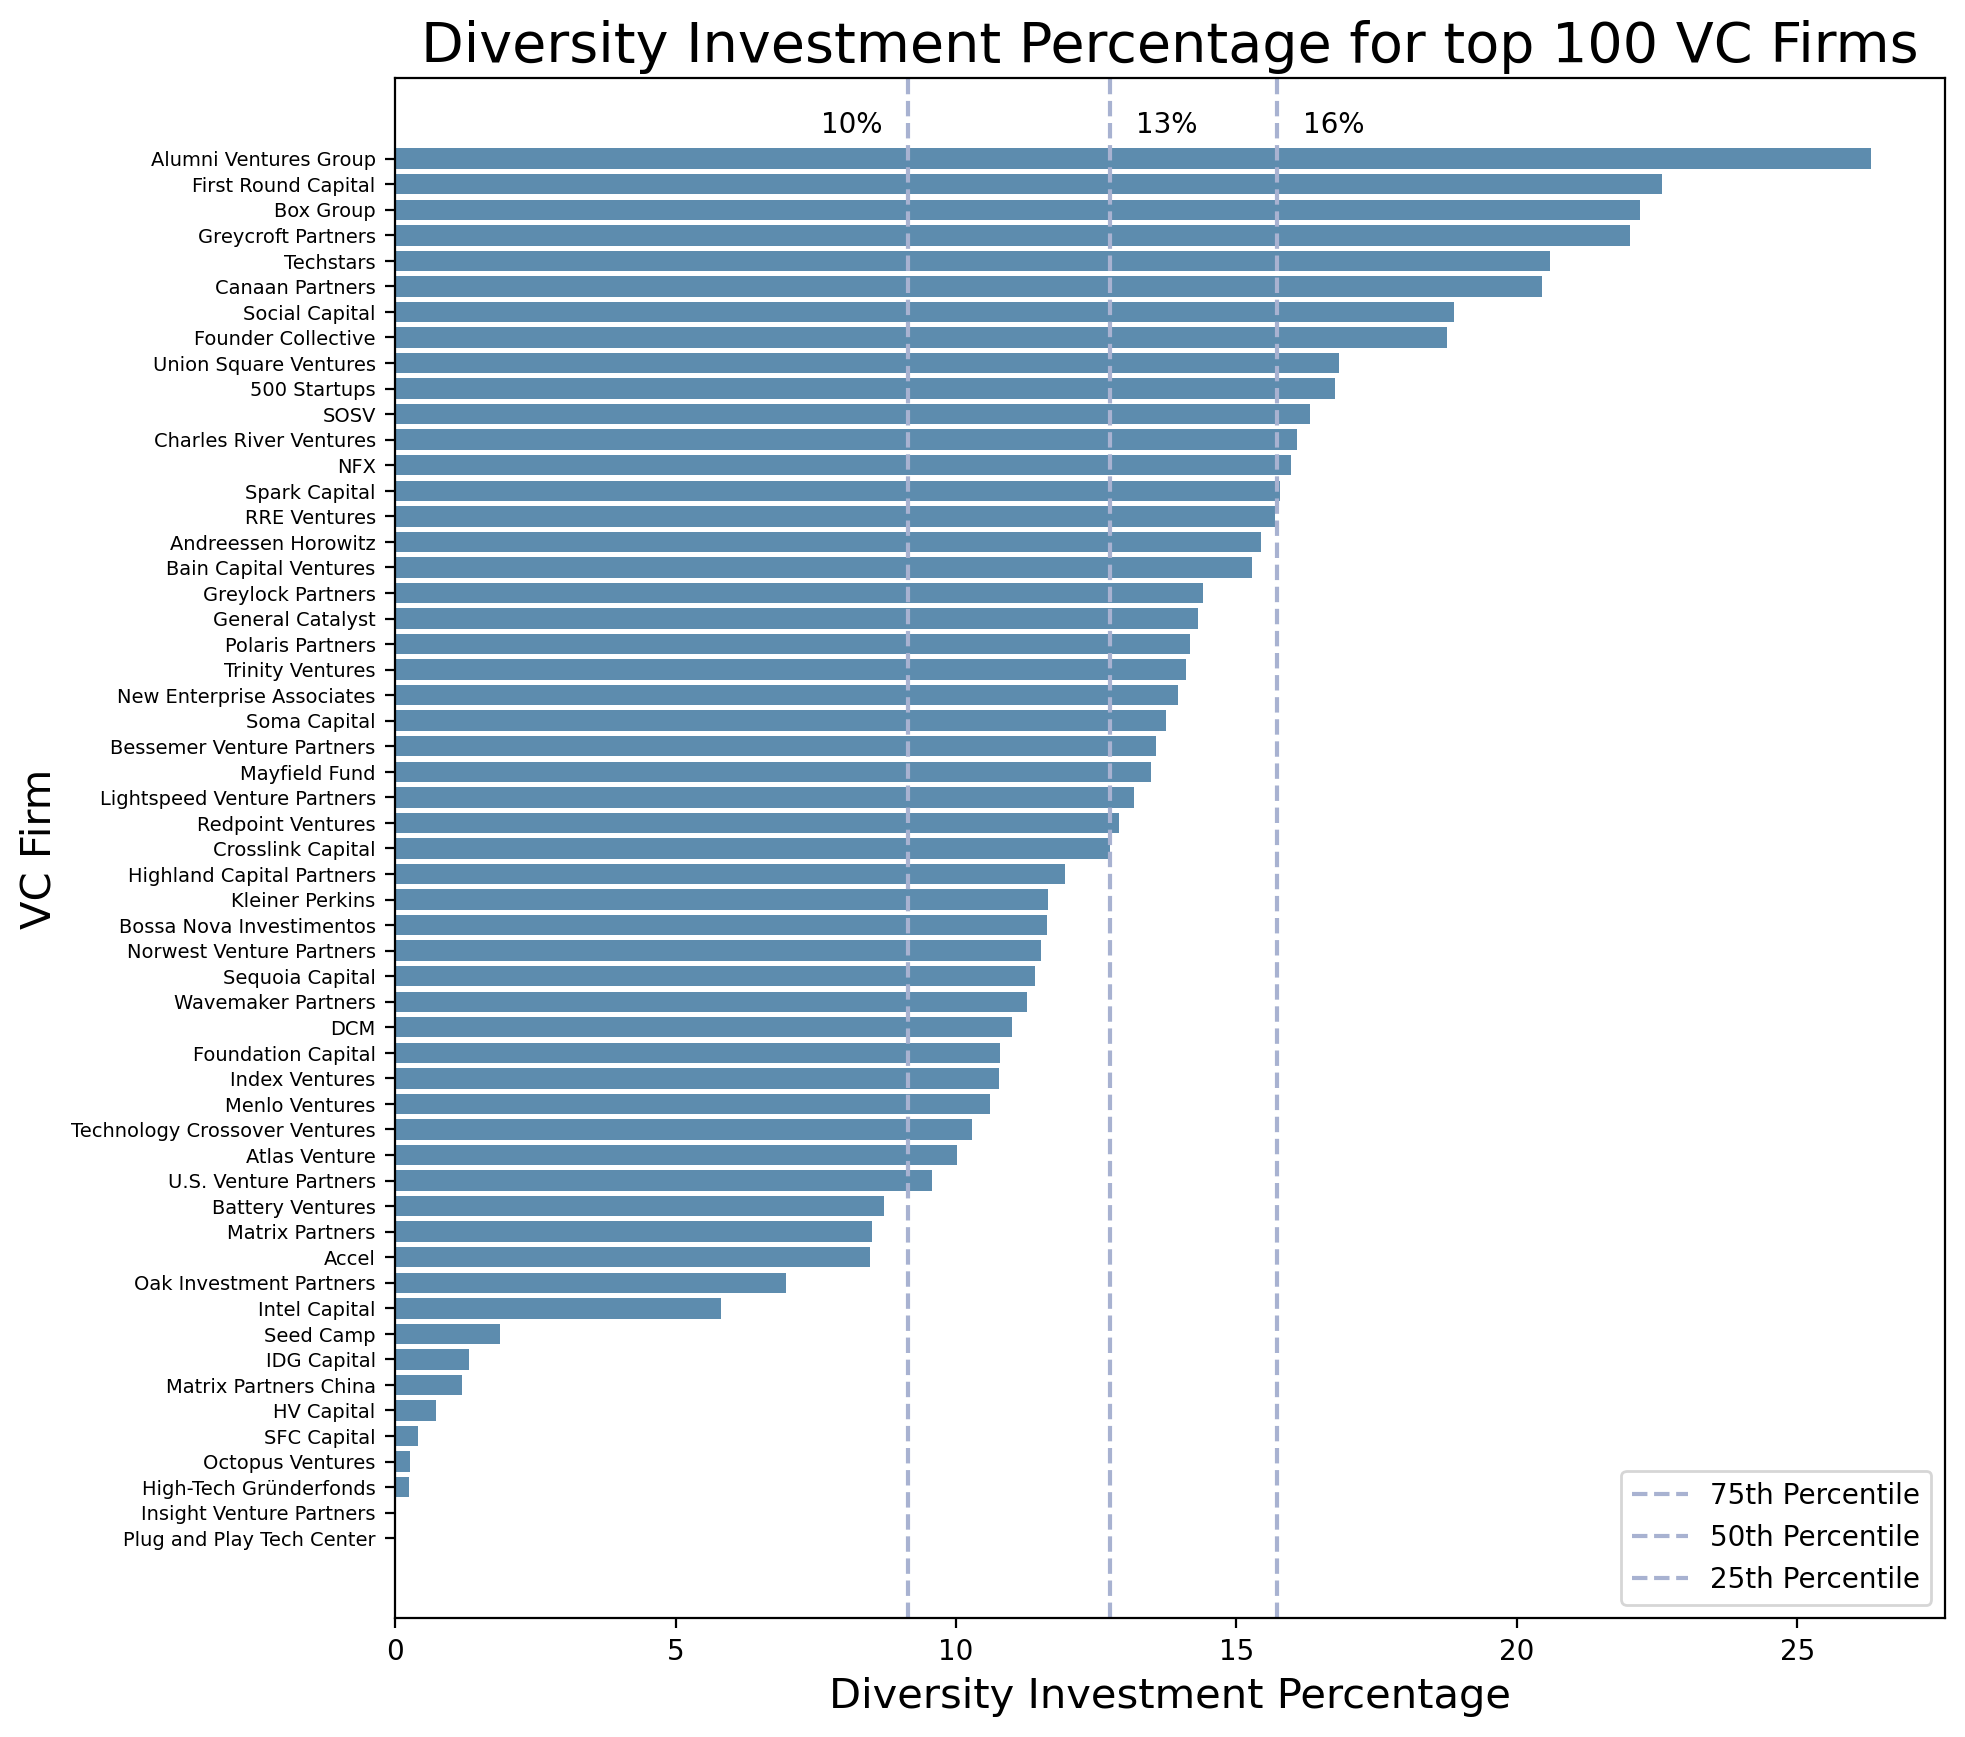

In [29]:
# create a bar chart of diversity investment percentage
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(
    df_sorted_dip["VC Firm"],
    df_sorted_dip["DIP: Diversity Investment Percentage"],
    color="#5D8CAE",
)
ax.set_title(
    "Diversity Investment Percentage for top 100 VC Firms", fontsize=20
)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Percentage", fontsize=15)
ax.tick_params(axis="y", labelsize=7)
pv_75 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 75
)
pv_50 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 50
)
pv_25 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 25
)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75 + 1)) + "%",
    xy=(pv_75 + 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1) + "%",
    xy=(pv_50 + 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1) + "%",
    xy=(pv_25 - 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()


In [30]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investment Percentage for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)
